<a href="https://colab.research.google.com/github/talxa/tu_verras/blob/master/Tu_Verras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
def load_dataframe(dataset):
  df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
  df['MEDV'] = dataset['target']
  return df
boston_dataframe = load_dataframe(dataset)
print(boston_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [4]:
def count_missing_values(boston_dataframe):
  return boston_dataframe.isnull().isna().sum()
print(count_missing_values(boston_dataframe))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ad9ebc990>,
      dtype=object)

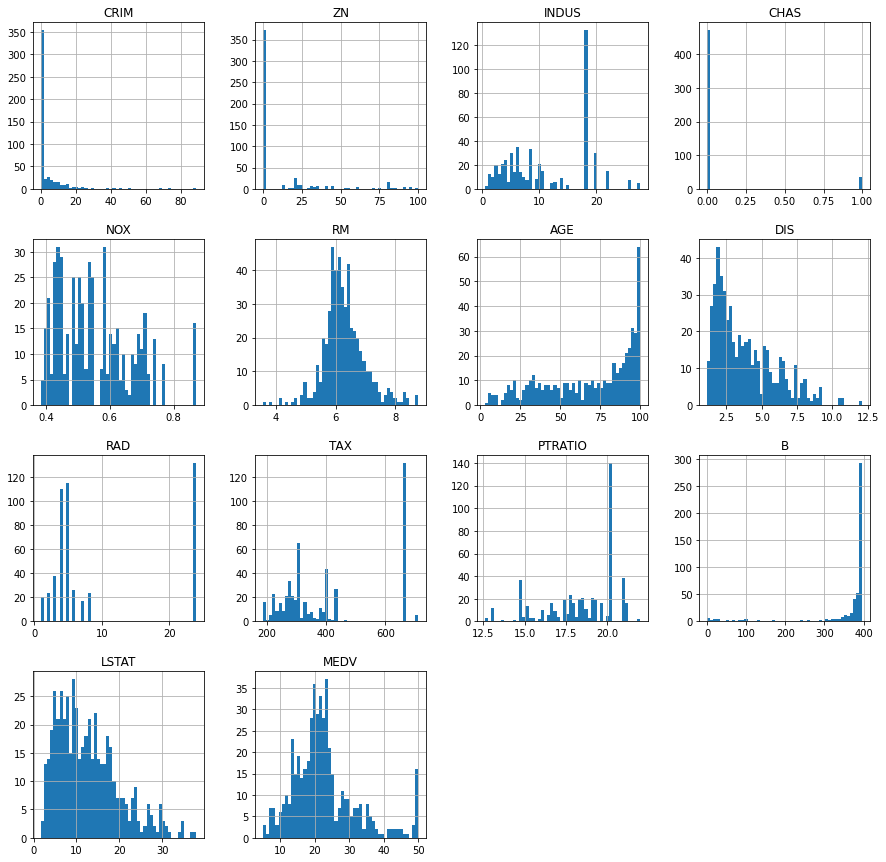

In [5]:
boston_dataframe.hist(bins=50,figsize=(15,15))

In [6]:
corr = boston_dataframe.corr(method ='pearson')

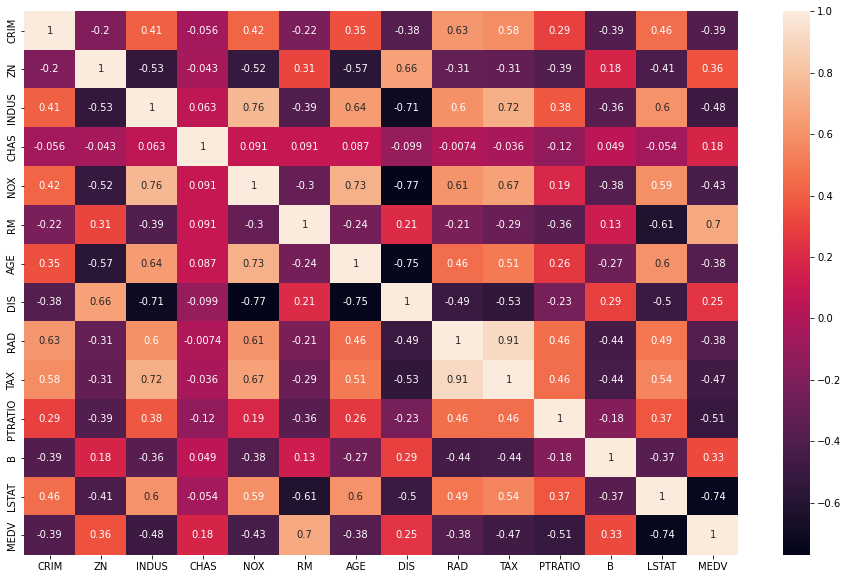

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

In [8]:
def compute_correlations_matrix(boston_dataframe):
  return boston_dataframe.corr(method ='pearson').to_dict()
correlations = compute_correlations_matrix(boston_dataframe)
print(correlations['MEDV'])

{'CRIM': -0.38830460858681154, 'ZN': 0.3604453424505433, 'INDUS': -0.48372516002837274, 'CHAS': 0.17526017719029868, 'NOX': -0.42732077237328203, 'RM': 0.6953599470715401, 'AGE': -0.3769545650045961, 'DIS': 0.249928734085904, 'RAD': -0.38162623063977735, 'TAX': -0.4685359335677667, 'PTRATIO': -0.5077866855375623, 'B': 0.3334608196570662, 'LSTAT': -0.7376627261740145, 'MEDV': 1.0}


In [9]:
print(f"The correlation coefficient between the median value and the number of rooms = {correlations['MEDV']['RM']}")

The correlation coefficient between the median value and the number of rooms = 0.6953599470715401


In [10]:
lstat = correlations['MEDV']['LSTAT']
print(f"(LSTAT:{lstat})attribute is the most negatively correlated with the median value")

(LSTAT:-0.7376627261740145)attribute is the most negatively correlated with the median value


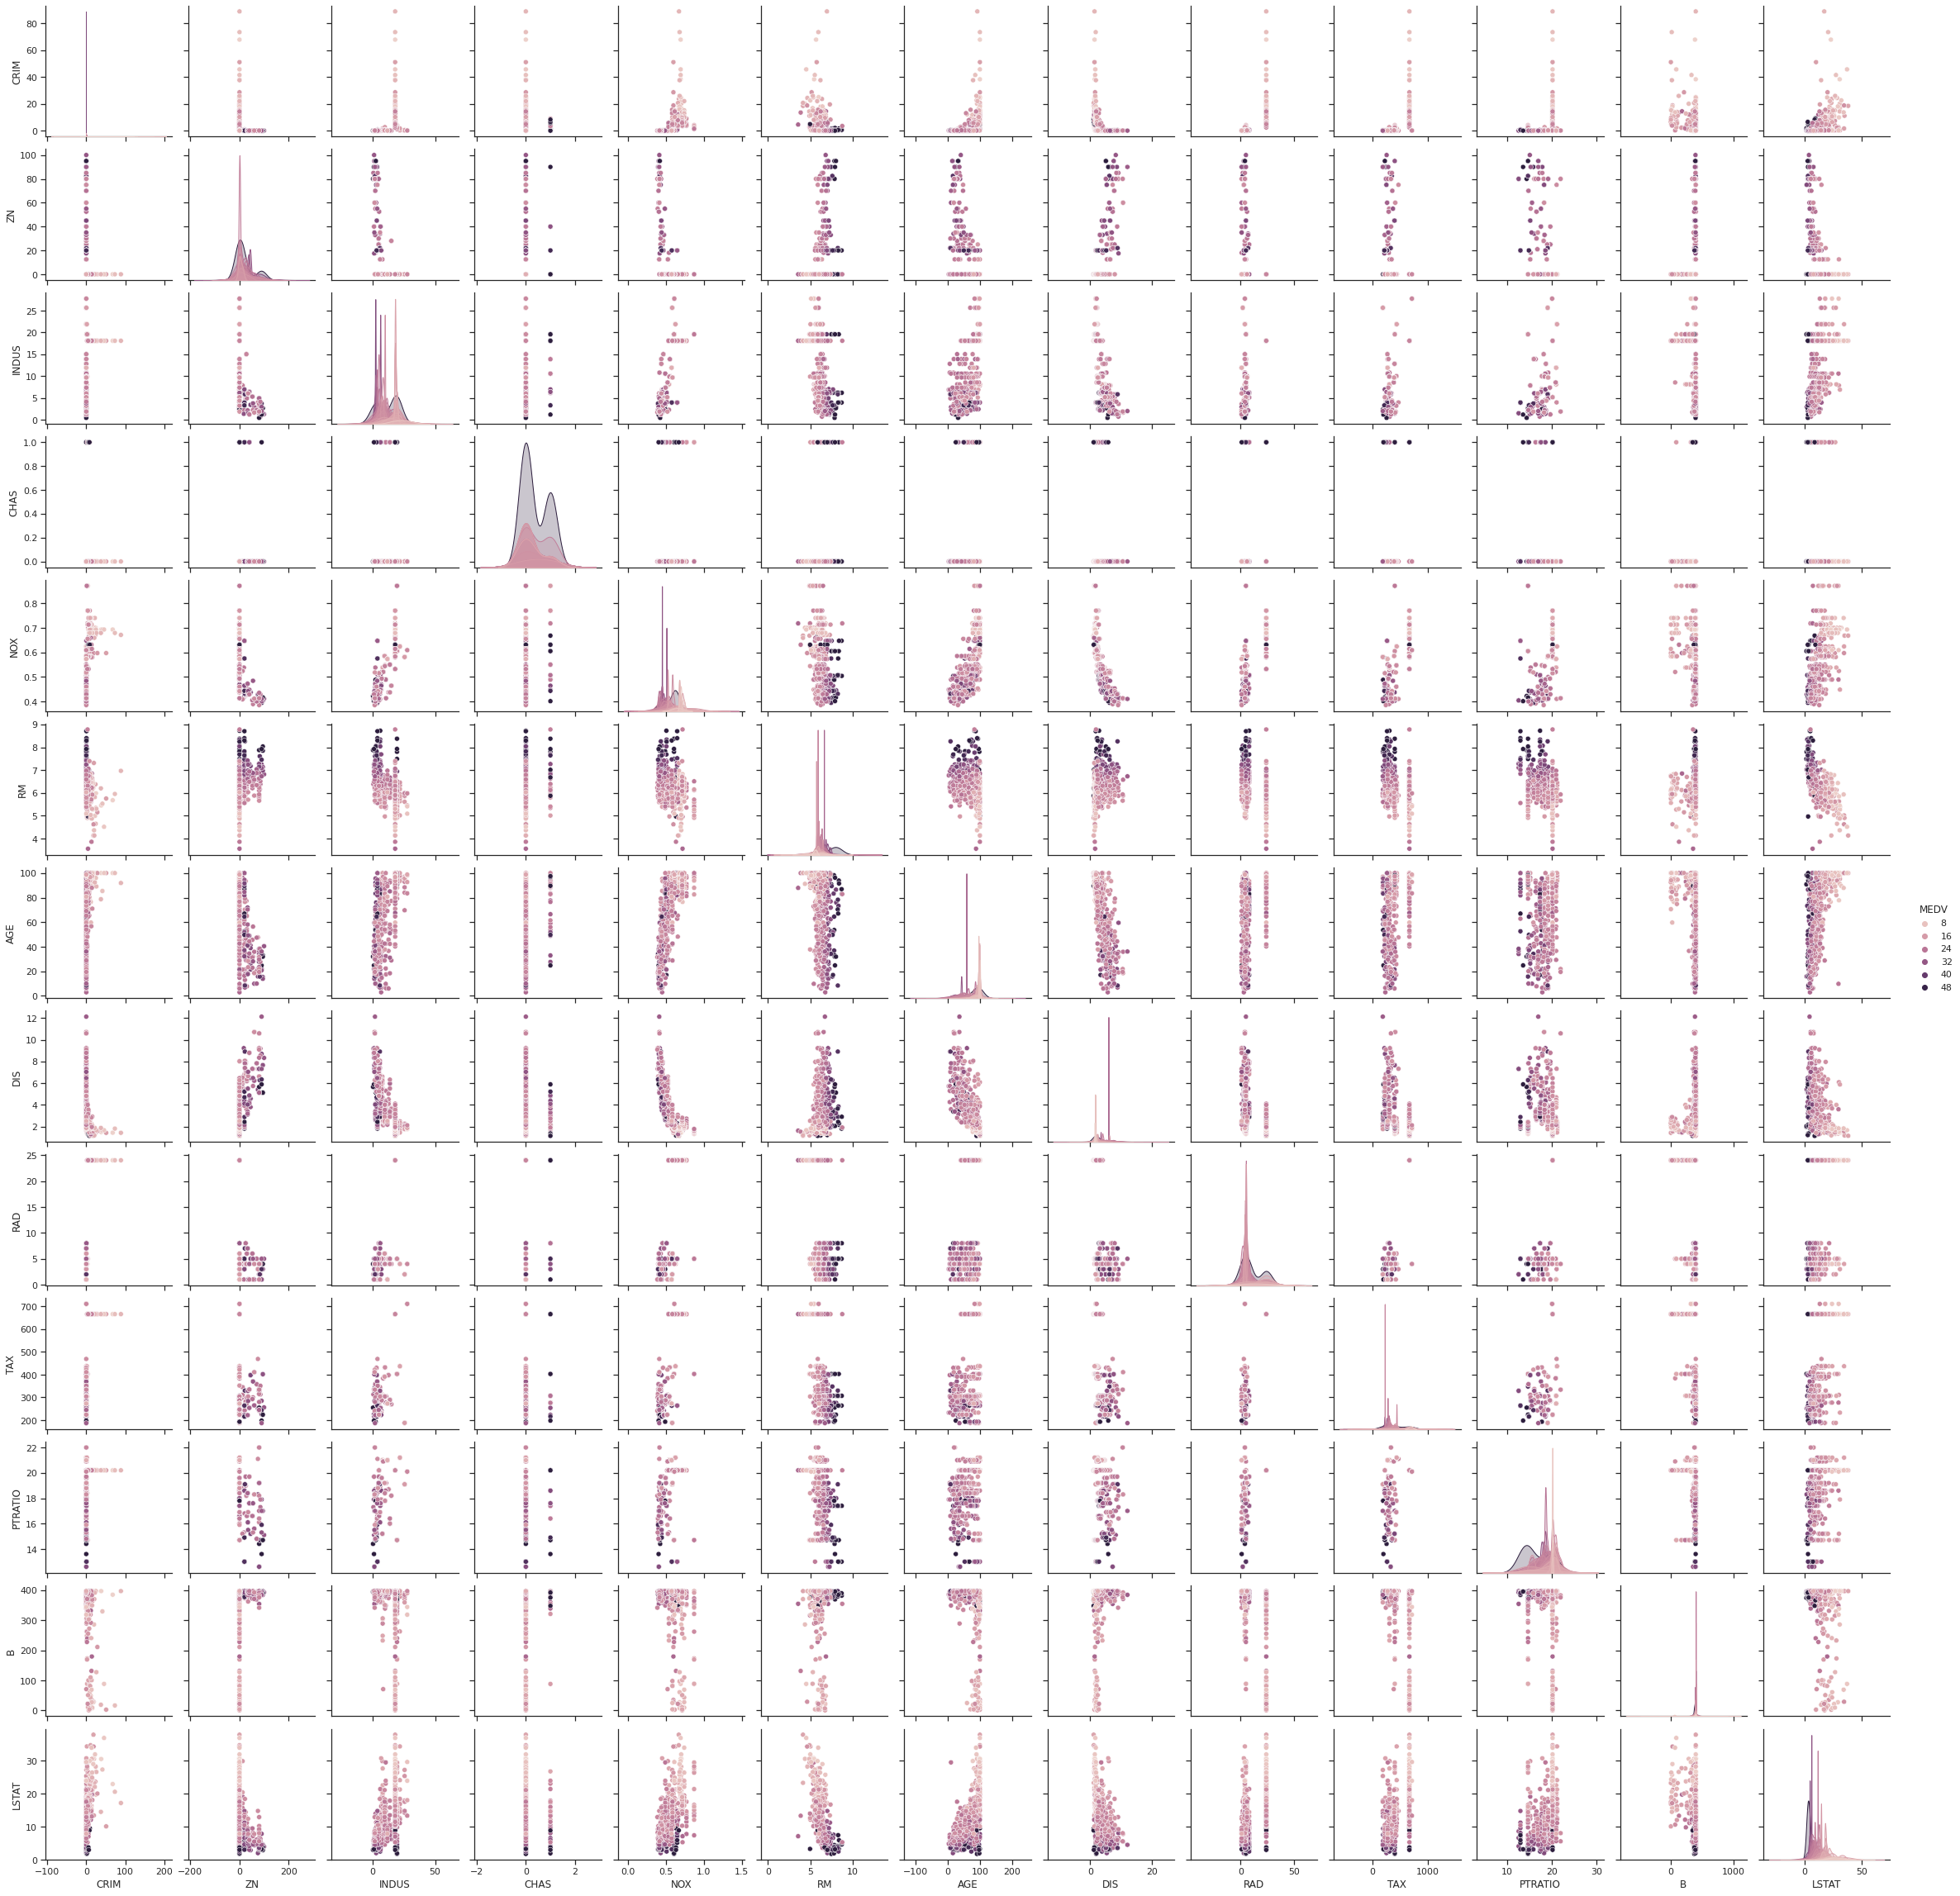

In [11]:
# scatter_matrix(boston_dataframe, alpha = 0.2, figsize = (30, 30), diagonal = 'hist')
sns.set_theme(style="ticks")
sns.pairplot(boston_dataframe, hue="MEDV")

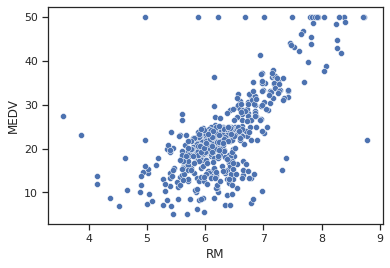

In [12]:
medv = boston_dataframe['MEDV']
rm = boston_dataframe['RM']
sns.scatterplot(x=rm,y=medv)

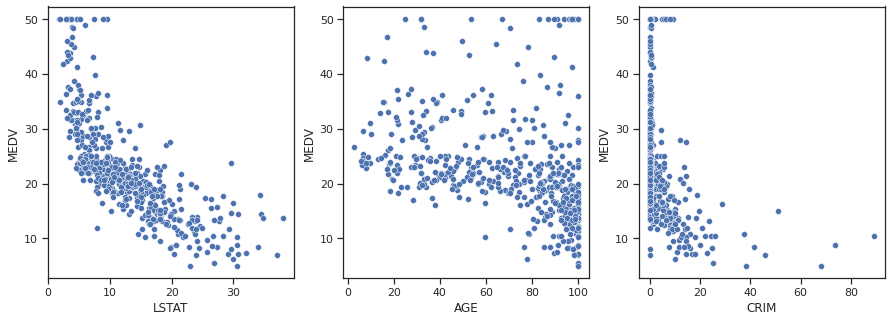

In [13]:
lstat = boston_dataframe['LSTAT']
age = boston_dataframe['AGE']
crim = boston_dataframe['CRIM']

fix,axis=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=lstat,y=medv,ax=axis[0])
sns.scatterplot(x=age,y=medv,ax=axis[1])
sns.scatterplot(x=crim,y=medv,ax=axis[2])

{'CRIM': 0.4556214794479463, 'ZN': -0.41299457452700283, 'INDUS': 0.603799716476621, 'CHAS': -0.05392929837569424, 'NOX': 0.5908789208808451, 'RM': -0.6138082718663955, 'AGE': 0.6023385287262395, 'DIS': -0.4969958308636848, 'RAD': 0.4886763349750666, 'TAX': 0.5439934120015698, 'PTRATIO': 0.3740443167146772, 'B': -0.36608690169159663, 'LSTAT': 1.0, 'MEDV': -0.7376627261740145}


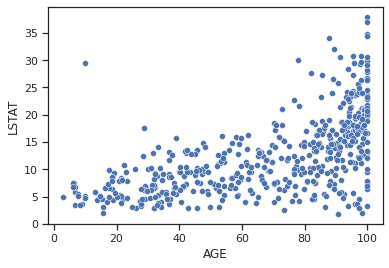

In [14]:
lstat_corr = correlations['LSTAT']
print(lstat_corr)
sns.scatterplot(x=age,y=lstat)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = boston_dataframe.drop(['MEDV'], axis = 1)
y = boston_dataframe['MEDV']

reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

reg.fit(x_train, y_train)
medv_predict = reg.predict(x_test)
df_medv = pd.DataFrame(medv_predict)
print(y)
print(df_medv.round(1))

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
        0
0    32.7
1    28.1
2    18.0
3    21.5
4    18.8
..    ...
97   29.1
98   37.1
99   20.5
100  17.4
101  17.7

[102 rows x 1 columns]
